# Classification of Heart Disease Diagnosis From Predictor Variables

<font color = purple>
    
## Introduction
    
<font color = black>

A slow and painful spiral culminating in the malfunction of the most crucial organ in the human body: heart disease. Using heart disease data provided by the Cleveland Clinic Foundation, the aim of this project is to create a k-nearest neighbors algorithm which is able to classify the diagnosis of heart disease based on 5 predictor variables.

<font color = purple>

## Preliminary Exploratory Data Analysis

Firstly, libraries must be imported, and the data needs to be read by the R program.

In [30]:
# import libraries needed
library(tidyverse)
library(repr)
library(rvest)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)

In [31]:
# read the dataset for heart disease

url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heart_data <- as_tibble(read.table(url, sep = ",", header = FALSE, na.strings = "?"))

# display the data
heart_data

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
38,1,3,138,175,0,0,173,0,0.0,1,NA,3,0


*Table 1: Original heart disease data downloaded from the Cleveland Database.*

It is important to note that the column V14 refers to a patient's heart disease diagnosis. It is a non-
variable, consisting of values 1-4, with 1 representing a negative diagnosis, while 2-4 represents a positive diagnosis. 

<font color = blue>

### *Cleaning Data*

In [32]:
# add column names
colnames(heart_data) <- c("age", "sex", "chest_pain_type", "resting_blood_pressure", "cholesterol", "fasting_blood_sugar", "resting_electrocardiographic", "max_heart_rate", "exercise_induced_angina", "depression", "peak_exercise", "number_vessels", "normality", "heart_disease_diagnosis")

head(heart_data)

age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic,max_heart_rate,exercise_induced_angina,depression,peak_exercise,number_vessels,normality,heart_disease_diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


*Table 2.1: Addition of column labels to heart disease data.*

Not all columns will be used, as this classification model will only use predictor variables that are continuous.

In [33]:
# only keep select columns
heart_data <- heart_data |>
    select(age, resting_blood_pressure, cholesterol, max_heart_rate, depression, heart_disease_diagnosis)

heart_data

age,resting_blood_pressure,cholesterol,max_heart_rate,depression,heart_disease_diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
63,145,233,150,2.3,0
67,160,286,108,1.5,2
67,120,229,129,2.6,1
⋮,⋮,⋮,⋮,⋮,⋮
57,130,131,115,1.2,3
57,130,236,174,0.0,1
38,138,175,173,0.0,0


*Table 2.2: Heart disease data with only chosen columns kept.*

Additionally, the heart disease diagnosis column will return either positive or negative, rather than numbers from 1-4, in order to improve understandability. 

In [34]:
# mutate column 14 to be more understandable by readers
heart_data <- heart_data |>
    mutate(heart_disease_diagnosis = case_when(heart_disease_diagnosis == 0 ~ "negative",
                                heart_disease_diagnosis == 1 ~ "positive",
                                heart_disease_diagnosis == 2 ~ "positive",
                                heart_disease_diagnosis == 3 ~ "positive",
                                heart_disease_diagnosis == 4 ~ "positive"))
heart_data

age,resting_blood_pressure,cholesterol,max_heart_rate,depression,heart_disease_diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
63,145,233,150,2.3,negative
67,160,286,108,1.5,positive
67,120,229,129,2.6,positive
⋮,⋮,⋮,⋮,⋮,⋮
57,130,131,115,1.2,positive
57,130,236,174,0.0,positive
38,138,175,173,0.0,negative


*Table 2.3: Heart disease data with the alteration of values for readability.*

<font color = purple>

## Preliminary Exploratory Data Analysis
 
<font color = blue>

### *Splitting the Data*

<font color = black>

Exploratory data analysis will only be performed on the training data set, thus, 75% of the data will be in the training set, while the other 25% will be used as the testing set. 
    
The seed set will remain constant throughout the entirety of the project.

In [35]:
set.seed(9898)

# split into testing and training data
heart_data_split <- initial_split(heart_data, prop = 0.75, strata = heart_disease_diagnosis)
heart_data_training_set <- training(heart_data_split)
heart_data_testing_set <- testing(heart_data_split)

In [36]:
# display training and testing data sets
heart_data_training_set

age,resting_blood_pressure,cholesterol,max_heart_rate,depression,heart_disease_diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
63,145,233,150,2.3,negative
37,130,250,187,3.5,negative
41,130,204,172,1.4,negative
⋮,⋮,⋮,⋮,⋮,⋮
44,120,169,144,2.8,positive
63,140,187,144,4.0,positive
57,130,236,174,0.0,positive


*Table 3.1.1: Display of heart disease data training set.*

In [37]:
heart_data_testing_set

age,resting_blood_pressure,cholesterol,max_heart_rate,depression,heart_disease_diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
67,160,286,108,1.5,positive
56,130,256,142,0.6,positive
52,172,199,162,0.5,negative
⋮,⋮,⋮,⋮,⋮,⋮
45,110,264,132,1.2,positive
68,144,193,141,3.4,positive
57,130,131,115,1.2,positive


*Table 3.1.2: Display of heart disease data testing set.*

<font color = blue>

### *Number of Observations in Each Class*

<font color = black>
    
We will compute the number of observations in the two classification classes, to gain an idea as to how the data is distributed.

In [38]:
# number of observations in each class for prediction variables
diagnoses_distributions <- heart_data_training_set |>
    group_by(heart_disease_diagnosis) |>
    summarize(count = n())

diagnoses_distributions

heart_disease_diagnosis,count
<chr>,<int>
negative,123
positive,104


*Table 3.2: Distribution of positive and negative diagnoses in the training set.*

The number of negative and positive diagnoses are relatively similar, meaning that our results are less influenced by the majority of a certain class.

<font color = blue>

### *Missing Data*

In [39]:
# count rows with missing data
missing_data <- sum(is.na(heart_data_training_set $ age)) |>
    sum(is.na(heart_data_training_set $ resting_blood_pressure)) |>
    sum(is.na(heart_data_training_set $ cholesterol)) |>
    sum(is.na(heart_data_training_set $ max_heart_rate)) |>
    sum(is.na(heart_data_training_set $ depression)) |>
    sum(is.na(heart_data_training_set $ heart_disease_diagnosis))

missing_data

[1] 0

As shown above, there is no missing data which may influence classification predictions in the training set.

<font color = blue>

### *Means of Predictor Variables*

In [40]:
# find the mean of each variable used for predictions
heart_data_mean_values <- heart_data_training_set |>
    summarize(across(age:depression, mean))

heart_data_mean_values

age,resting_blood_pressure,cholesterol,max_heart_rate,depression
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
54.44053,131.3833,248.1542,150.0881,1.103084


*Table 3.3: Table showing mean values for all 5 predictor variables.*

<font color = blue>

### *Visualizing Data*
    
<font color = orange>
    
**Predictor Variables vs Heart Disease Classification**
   
<font color = black>
    
Each predictor variable will be along the x axis, while the number of diagnoses in relation to the variable will be on the y axis, in scatterplot form. All points will be coloured in terms of diagnosis status.

`summarise()` has grouped output by 'age'. You can override using the `.groups`
argument.


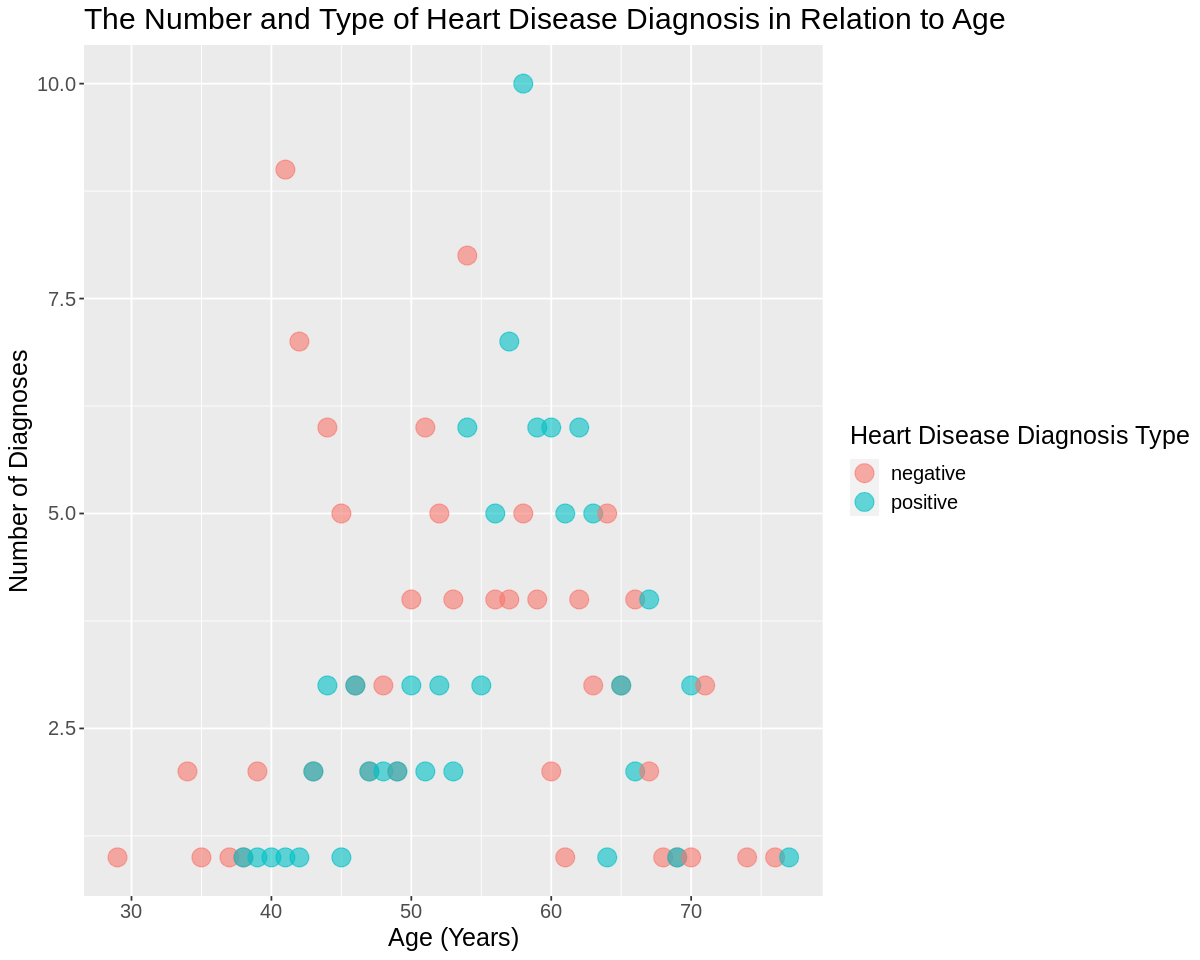

In [41]:
options(repr.plot.width = 10, repr.plot.height = 8)

sort_age_diagnosis <- heart_data_training_set |>
    select(age, heart_disease_diagnosis) |>
    group_by(age, heart_disease_diagnosis) |>
    summarize(count = n()) 

age_vs_diagnosis_plot <- sort_age_diagnosis |>
    ggplot(aes(x = age, y = count, color = heart_disease_diagnosis)) +
    geom_point(size = 5, alpha = 0.6) +
    labs(x = "Age (Years)", y = "Number of Diagnoses", color = "Heart Disease Diagnosis Type") +
    ggtitle("The Number and Type of Heart Disease Diagnosis in Relation to Age") +
    theme(text = element_text(size = 15))
age_vs_diagnosis_plot

*Graph 4.1.1: Scatterplot the relationship between the number and type of diagnoses and age.*

`summarise()` has grouped output by 'resting_blood_pressure'. You can override
using the `.groups` argument.


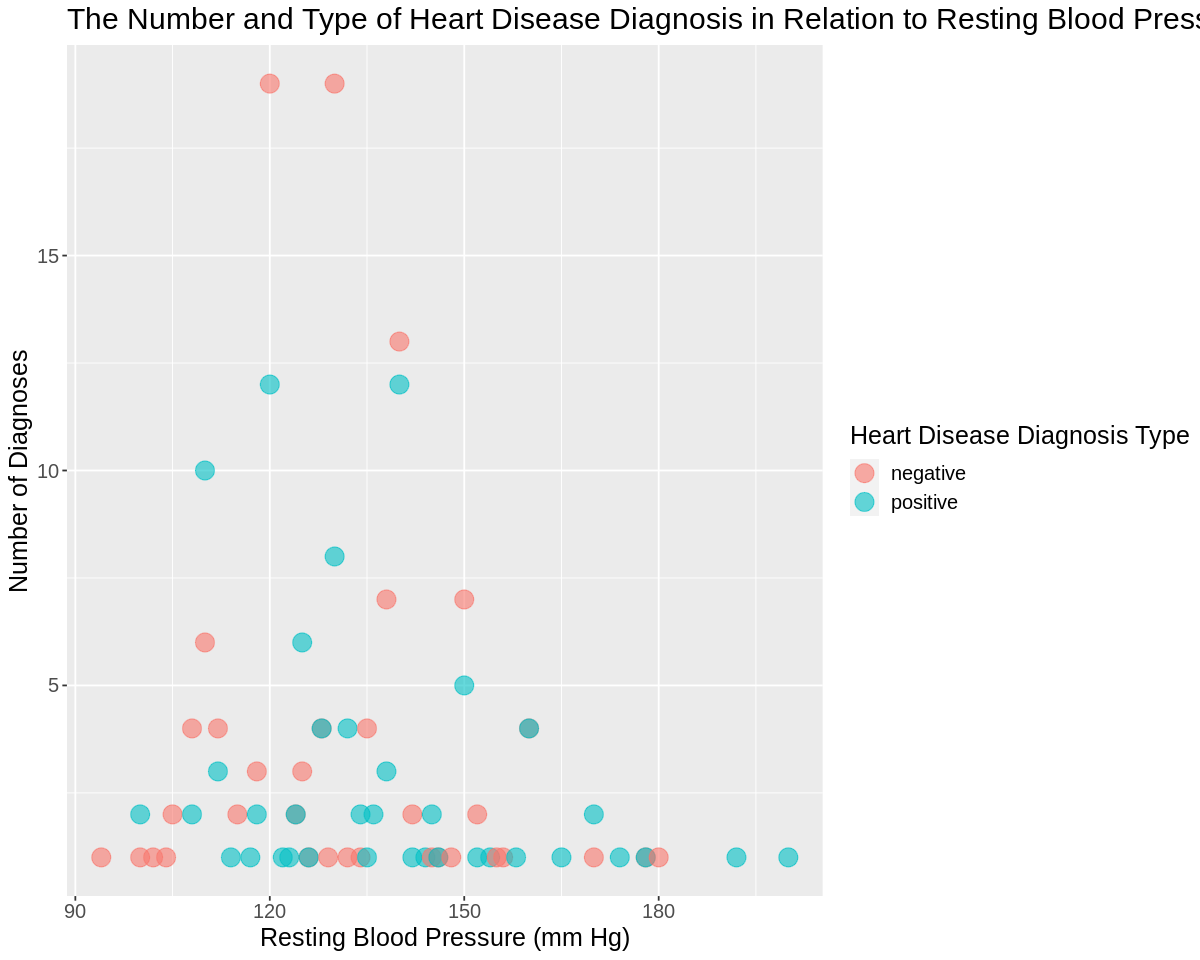

In [42]:
sort_resting_blood_pressure_diagnosis <- heart_data_training_set |>
    select(resting_blood_pressure, heart_disease_diagnosis) |>
    group_by(resting_blood_pressure, heart_disease_diagnosis) |>
    summarize(count = n())

resting_blood_pressure_vs_diagnosis_plot <- sort_resting_blood_pressure_diagnosis |>
    ggplot(aes(x = resting_blood_pressure, y = count, color = heart_disease_diagnosis)) +
    geom_point(size = 5, alpha = 0.6) +
    labs(x = "Resting Blood Pressure (mm Hg)", y = "Number of Diagnoses", color = "Heart Disease Diagnosis Type") +
    ggtitle("The Number and Type of Heart Disease Diagnosis in Relation to Resting Blood Pressure") +
    theme(text = element_text(size = 15))
resting_blood_pressure_vs_diagnosis_plot

*Graph 4.1.2: Scatterplot the relationship between the number and type of diagnoses and resting blood pressure.*

`summarise()` has grouped output by 'cholesterol'. You can override using the
`.groups` argument.


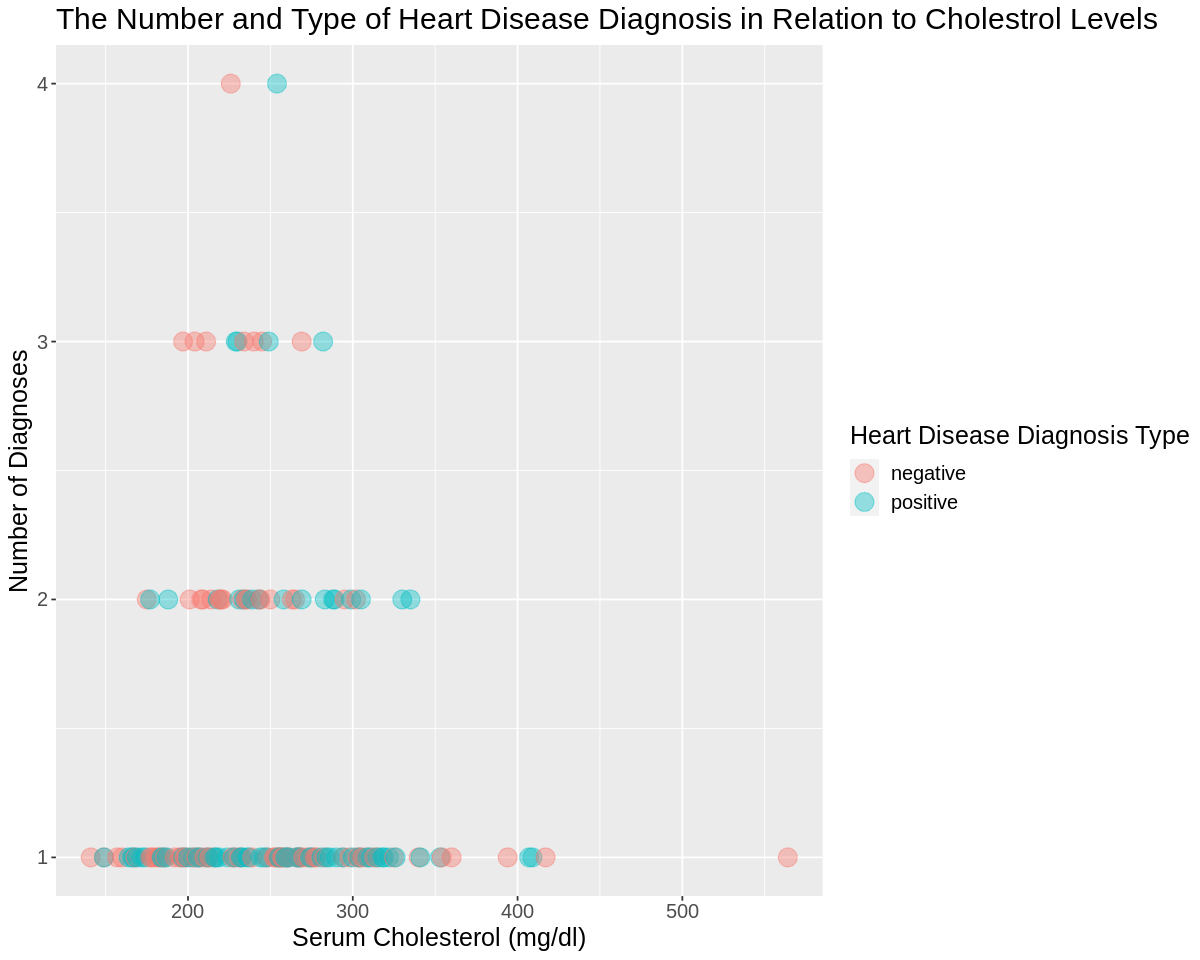

In [43]:
sort_cholesterol_diagnosis <- heart_data_training_set |>
    select(cholesterol, heart_disease_diagnosis) |>
    group_by(cholesterol, heart_disease_diagnosis) |>
    summarize(count = n())

cholesterol_vs_diagnosis_plot <- sort_cholesterol_diagnosis |>
    ggplot(aes(x = cholesterol, y = count, color = heart_disease_diagnosis)) +
    geom_point(size = 5, alpha = 0.4) +
    labs(x = "Serum Cholesterol (mg/dl)", y = "Number of Diagnoses", color = "Heart Disease Diagnosis Type") +
    ggtitle("The Number and Type of Heart Disease Diagnosis in Relation to Cholestrol Levels") +
    theme(text = element_text(size = 15))
cholesterol_vs_diagnosis_plot

*Graph 4.1.3: Scatterplot the relationship between the number and type of diagnoses and cholesterol level.*

`summarise()` has grouped output by 'max_heart_rate'. You can override using
the `.groups` argument.


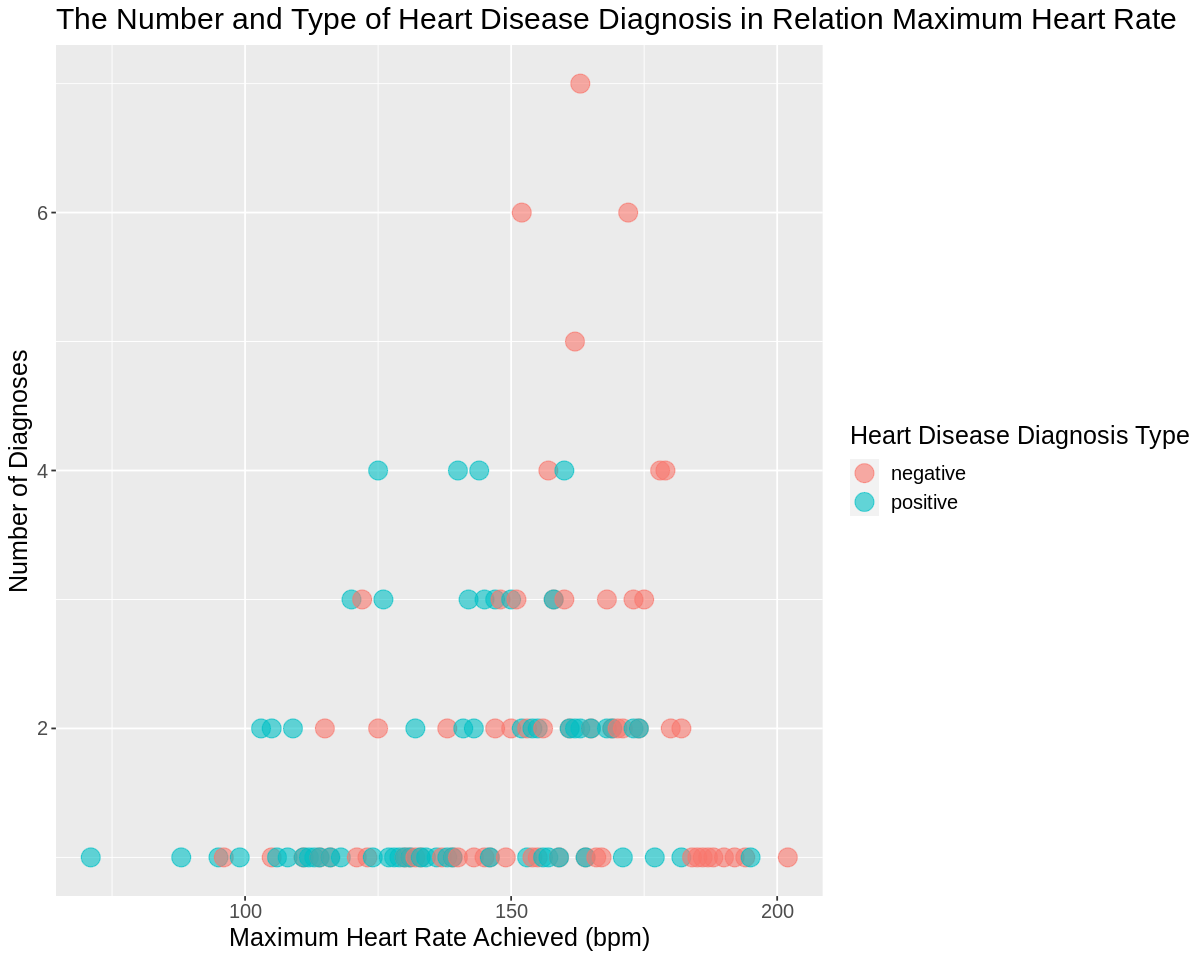

In [44]:
sort_max_heart_rate_diagnosis <- heart_data_training_set |>
    select(max_heart_rate, heart_disease_diagnosis) |>
    group_by(max_heart_rate, heart_disease_diagnosis) |>
    summarize(count = n())

max_heart_rate_vs_diagnosis_plot <- sort_max_heart_rate_diagnosis |>
    ggplot(aes(x = max_heart_rate, y = count, color = heart_disease_diagnosis)) +
    geom_point(size = 5, alpha = 0.6) +
    labs(x = "Maximum Heart Rate Achieved (bpm)", y = "Number of Diagnoses", color = "Heart Disease Diagnosis Type") +
    ggtitle("The Number and Type of Heart Disease Diagnosis in Relation Maximum Heart Rate") +
    theme(text = element_text(size = 15))
max_heart_rate_vs_diagnosis_plot

*Graph 4.1.4: Scatterplot the relationship between the number and type of diagnoses and maximum heart rate.*

`summarise()` has grouped output by 'depression'. You can override using the
`.groups` argument.


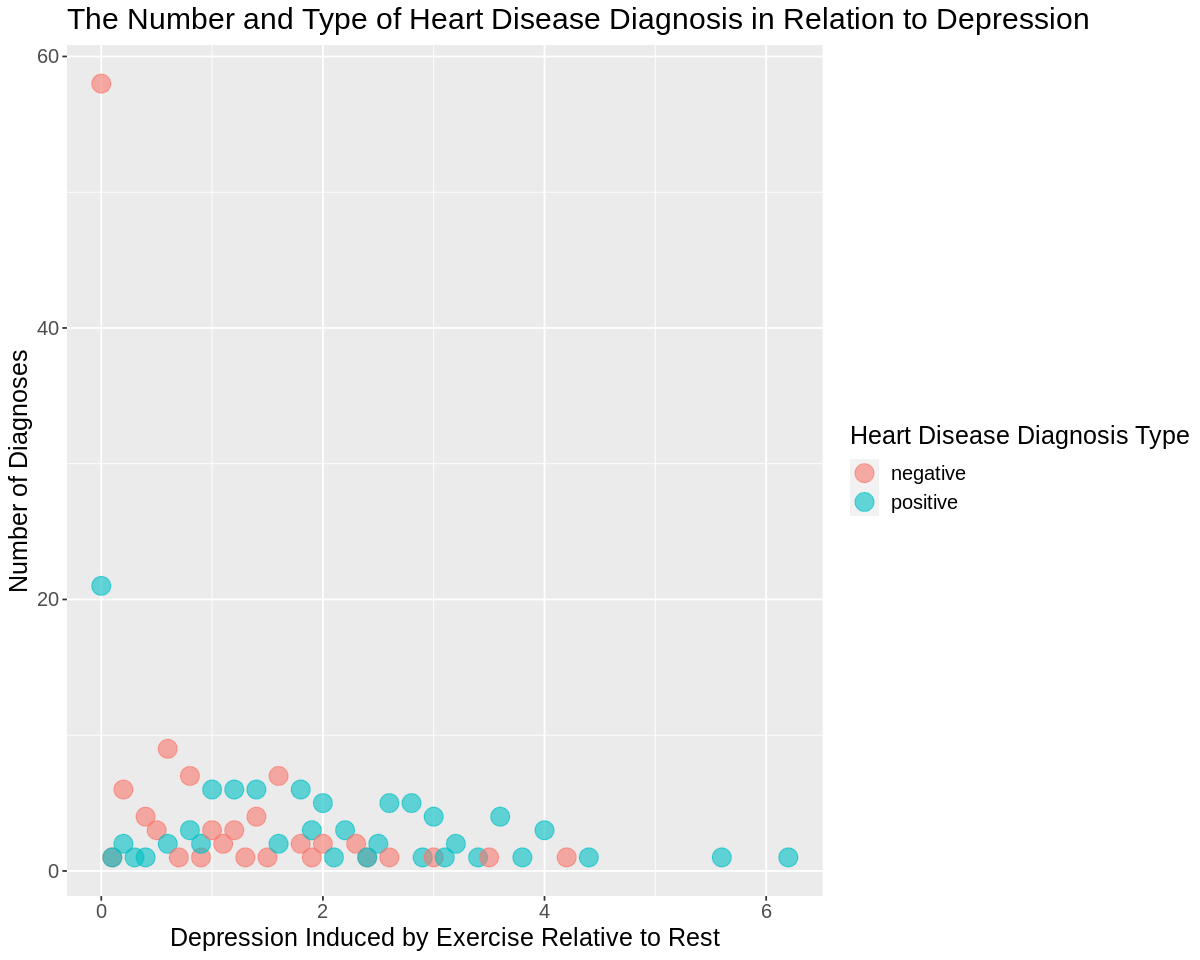

In [45]:
sort_depression_diagnosis <- heart_data_training_set |>
    select(depression, heart_disease_diagnosis) |>
    group_by(depression, heart_disease_diagnosis) |>
    summarize(count = n()) 

depression_vs_diagnosis_plot <- sort_depression_diagnosis |>
    ggplot(aes(x = depression, y = count, color = heart_disease_diagnosis)) +
    geom_point(size = 5, alpha = 0.6) +
    labs(x = "Depression Induced by Exercise Relative to Rest", y = "Number of Diagnoses", color = "Heart Disease Diagnosis Type") +
    ggtitle("The Number and Type of Heart Disease Diagnosis in Relation to Depression") +
    theme(text = element_text(size = 15))
depression_vs_diagnosis_plot

*Graph 4.1.5: Scatterplot the relationship between the number and type of diagnoses and depression induced by exercise relative to rest.*

The above 5 bar graphs display the relationship between the number of diagnoses and each predictor variable, with colors differentiating between negative and positive diagnoses.

<font color = orange>
    
**Distribution of Each Predictor Variable**
   
<font color = black>
    
The following boxplots displays the distribution of each predictor variable, including the average and outliers in the training data set. 

In [46]:
# wrangle the dataset
heart_data_training_set_adjusted <- heart_data_training_set |>
    select(-heart_disease_diagnosis) |>
    pivot_longer(cols = age:depression,
                names_to = "variable",
                values_to = "value")

heart_data_training_set_adjusted

variable,value
<chr>,<dbl>
age,63
resting_blood_pressure,145
cholesterol,233
⋮,⋮
cholesterol,236
max_heart_rate,174
depression,0


*Table 5.1: Heart data training set wrangled in order to create boxplots.*

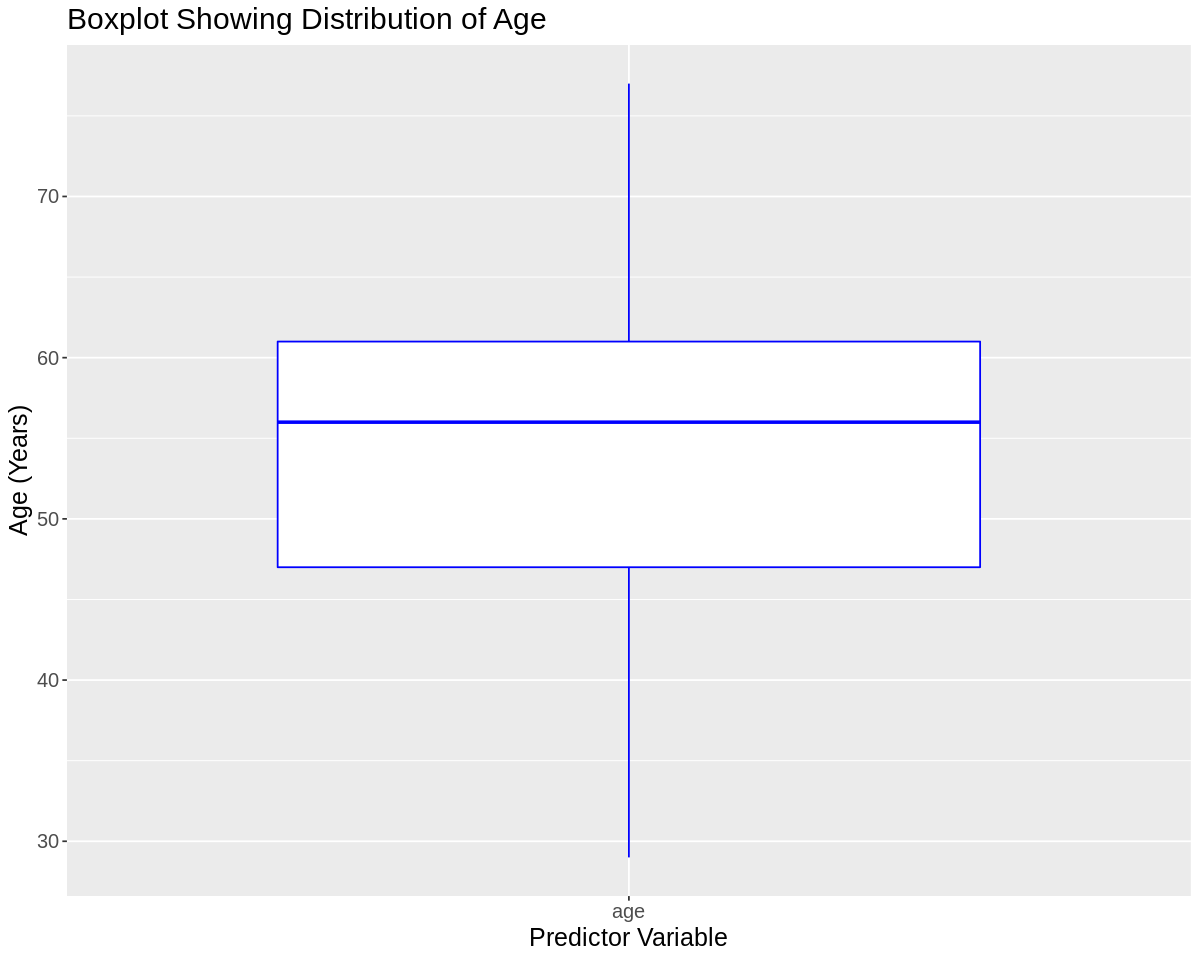

In [47]:
options(repr.plot.width = 10, repr.plot.height = 8)

age_variable_boxplot <- heart_data_training_set_adjusted |>
    filter(variable == "age") |>
    ggplot(aes(x = variable, y = value)) +
    geom_boxplot(color = "blue") +
    labs(x = "Predictor Variable", y = "Age (Years)") +
    theme(text = element_text(size = 15)) +
    ggtitle("Boxplot Showing Distribution of Age")

age_variable_boxplot

*Graph 5.2.1: Boxplot showing the distribution of the age variable.*

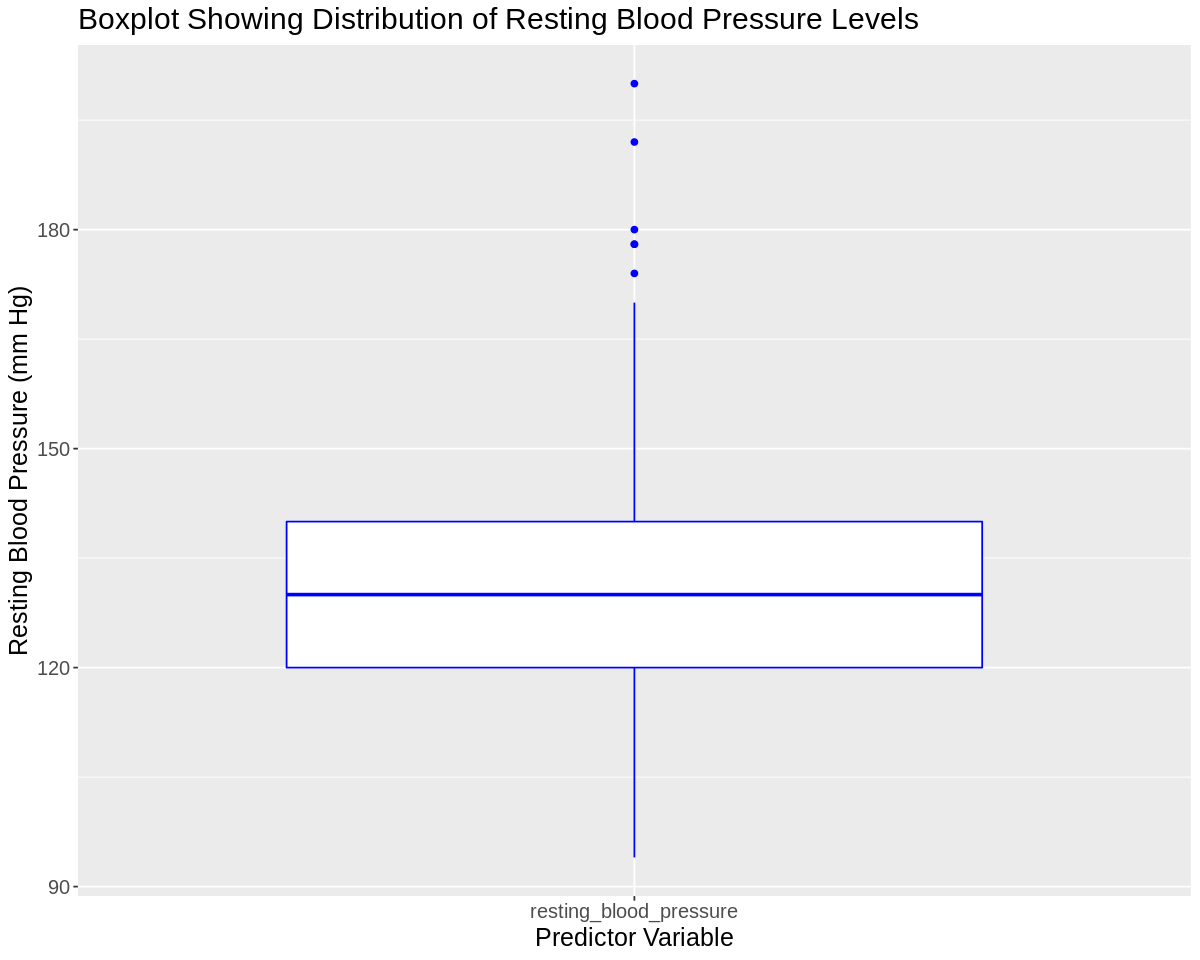

In [48]:
resting_blood_pressure_variable_boxplot <- heart_data_training_set_adjusted |>
    filter(variable == "resting_blood_pressure") |>
    ggplot(aes(x = variable, y = value)) +
    geom_boxplot(color = "blue") +
    labs(x = "Predictor Variable", y = "Resting Blood Pressure (mm Hg)") +
    theme(text = element_text(size = 15)) +
    ggtitle("Boxplot Showing Distribution of Resting Blood Pressure Levels")

resting_blood_pressure_variable_boxplot

*Graph 5.2.2: Boxplot showing the distribution of the resting blood pressure variable.*

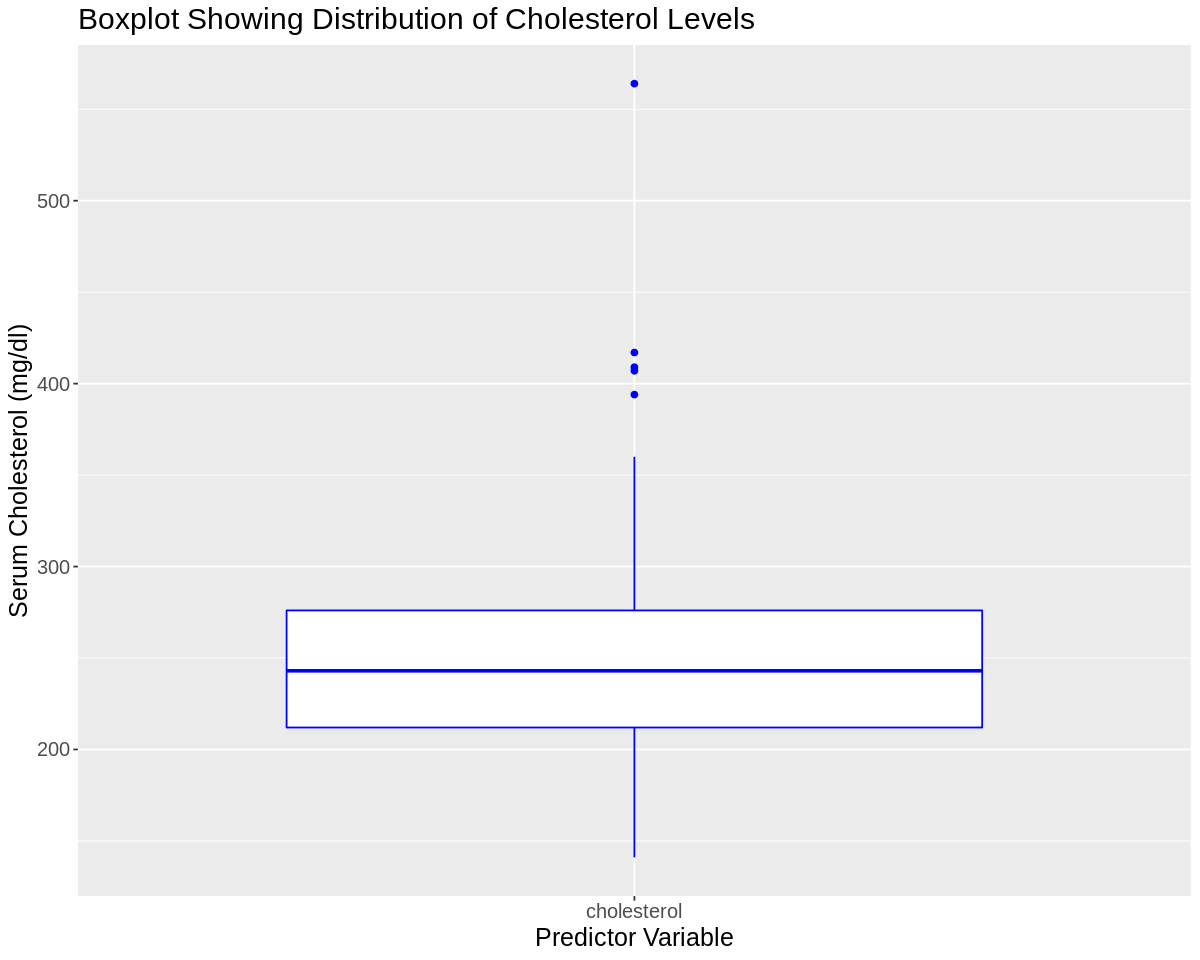

In [49]:
cholesterol_variable_boxplot <- heart_data_training_set_adjusted |>
    filter(variable == "cholesterol") |>
    ggplot(aes(x = variable, y = value)) +
    geom_boxplot(color = "blue") +
    labs(x = "Predictor Variable", y = "Serum Cholesterol (mg/dl)") +
    theme(text = element_text(size = 15)) +
    ggtitle("Boxplot Showing Distribution of Cholesterol Levels")

cholesterol_variable_boxplot

*Graph 5.2.3: Boxplot showing the distribution of the cholesterol level variable.*

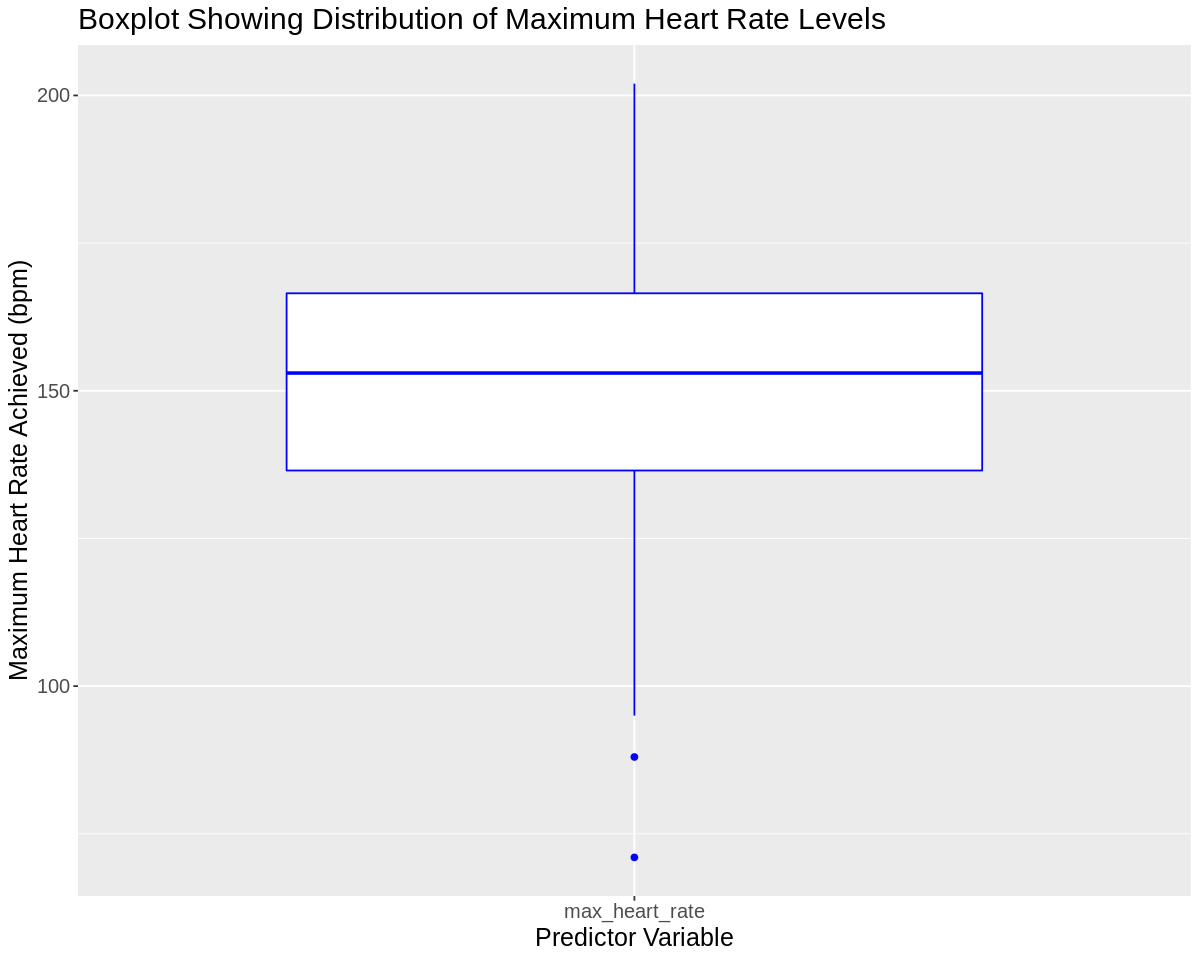

In [50]:
max_heart_rate_variable_boxplot <- heart_data_training_set_adjusted |>
    filter(variable == "max_heart_rate") |>
    ggplot(aes(x = variable, y = value)) +
    geom_boxplot(color = "blue") +
    labs(x = "Predictor Variable", y = "Maximum Heart Rate Achieved (bpm)") +
    theme(text = element_text(size = 15)) +
    ggtitle("Boxplot Showing Distribution of Maximum Heart Rate Levels")

max_heart_rate_variable_boxplot

*Graph 5.2.4: Boxplot showing the distribution of the maximum heart rate variable.*

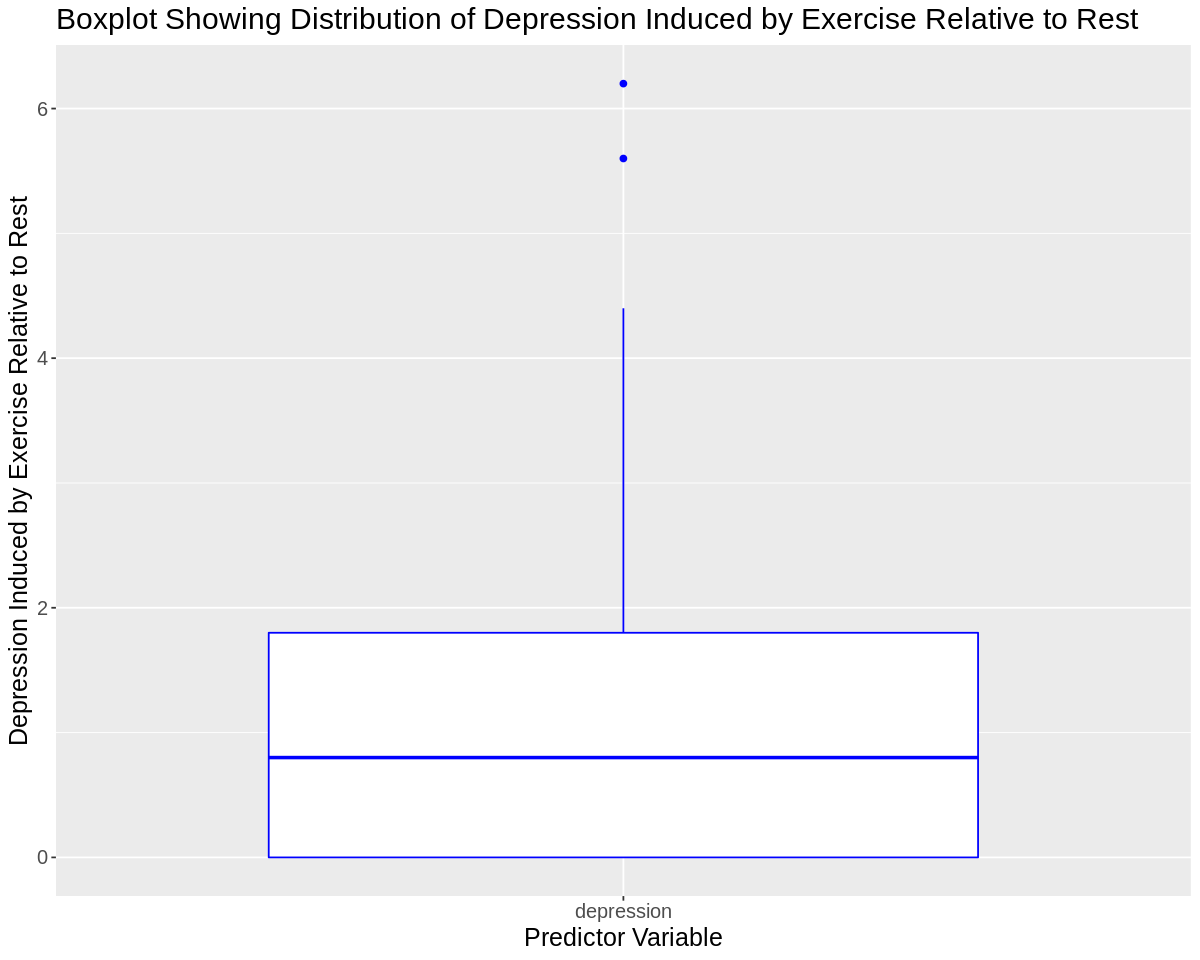

In [51]:
depression_variable_boxplot <- heart_data_training_set_adjusted |>
    filter(variable == "depression") |>
    ggplot(aes(x = variable, y = value)) +
    geom_boxplot(color = "blue") +
    labs(x = "Predictor Variable", y = "Depression Induced by Exercise Relative to Rest") +
    theme(text = element_text(size = 15)) +
    ggtitle("Boxplot Showing Distribution of Depression Induced by Exercise Relative to Rest")

depression_variable_boxplot

*Graph 5.2.5: Boxplot showing the distribution of the depression induced by exercise relative to rest variable.*

<font color = blue>

### *Initial Look into the Training Set*

<font color = black>
    
We will take an initial look inside the training data set in which we will use to train our model.

In [52]:
heart_proportions <- heart_data_training_set |>
    group_by(heart_disease_diagnosis) |>
    summarize(n = n()) |>
    mutate(percent = 100*n/nrow(heart_data_training_set))
heart_proportions

heart_disease_diagnosis,n,percent
<chr>,<int>,<dbl>
negative,123,54.18502
positive,104,45.81498


*Graph 6.1: Percentage of positive and negative heart disease diagnoses in the heart disease training set.*

The figure above depicts the split of negative heart disease diagnoses to positive heart disease diagnoses.

<font color = blue>

### *Pre-processing the Training Data*

<font color = black>
    
We will modify the variables in the training data so each predictor has a center of 0 and standard deviation of 1. This is done so that all predictors have equaally weighted effects on the model.

In [53]:
heart_recipe <- recipe(heart_disease_diagnosis ~., data = heart_data_training_set) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())
heart_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          5

Operations:

Scaling for all_predictors()
Centering for all_predictors()

<font color = blue>

### *Training the Classifier*

<font color = black>
    
We will train our model based on the information known in the traing data set. We will be performing a tuned five fold cross-validation to determine the optimal amounts of neighbours to use. We will be testing a value range of 1-15. We believe that this range is the best as the more values we test, the better the result from an analysis standpoint. However, due to our relative large data set and the limitations of our computers, we can not test a range that is too large.

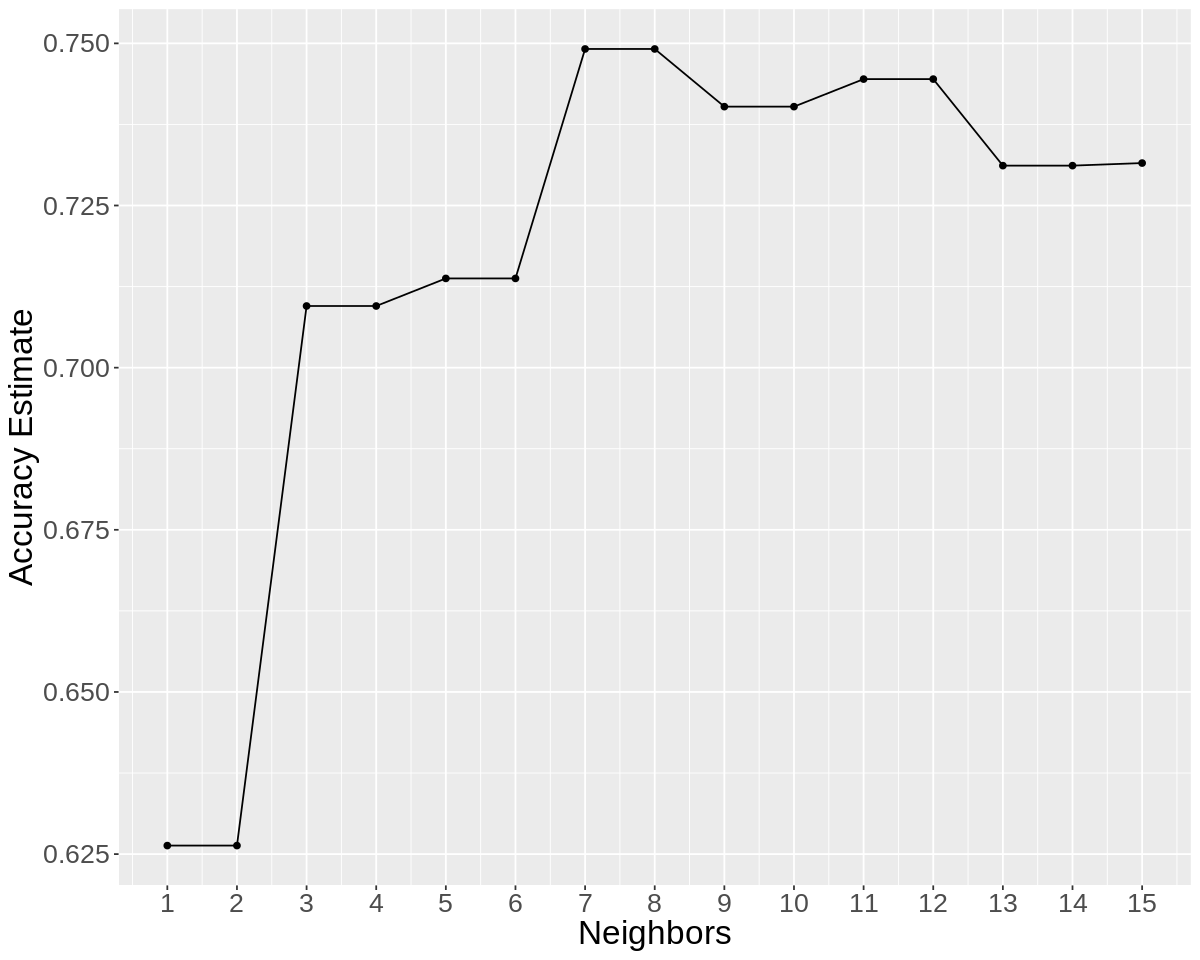

In [58]:
set.seed(9898)

heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

heart_vfold <- vfold_cv(heart_data_training_set, v = 5, strata = heart_disease_diagnosis)

kvals <- tibble(neighbors = seq(from = 1, to = 15, by = 1))

heart_results <- workflow() |>
                 add_recipe(heart_recipe) |>
                 add_model(heart_spec) |>
                 tune_grid(resamples = heart_vfold, grid = kvals) |>
                 collect_metrics()

accuracies <- heart_results |>
                 filter(.metric == 'accuracy')

heart_cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = 'Neighbors', y = 'Accuracy Estimate') +
                  theme(text = element_text(size = 20)) +
                  scale_x_continuous(breaks = 1:15)
heart_cross_val_plot

*Graph 7.1: Line plot showing accuracy estimate with different k neighbors from 1 to 15.*

In [57]:
best_k_val <- accuracies |>
    arrange(desc(mean)) |>
    slice(1)
best_k_val

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
7,accuracy,binary,0.7491392,5,0.04017747,Preprocessor1_Model07


*Table 7.2: Table showing the best k value for algorithm.*

The first figure above depicts the tibble highlighting the best value to use for k. The second figure above depicts a line graph when accuracy estimate is plotted on the y axis and the value for k is plotted on the x axis.

<font color = blue>

### *Creating the Model*

<font color = black>
    
We will now create the model with the optimal k value of 7 we retrived from the information above.

In [26]:
heart_final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 7) |>
       set_engine("kknn") |>
       set_mode("classification")

heart_final_fit <- workflow() |>
             add_recipe(heart_recipe) |>
             add_model(heart_final_spec) |>
            fit(data = heart_data_training_set)
heart_final_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(7,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3171806
Best kernel: rectangular
Best k: 7

<font color = blue>

### *Testing the Model*

<font color = black>
    
We will now test the model with the testing set. This will allow us to determine the accuracy of our model.

In [27]:
heart_disease_predictions <- predict(heart_final_fit, heart_data_testing_set) |>
                        bind_cols(heart_data_testing_set)
heart_disease_predictions

.pred_class,age,resting_blood_pressure,cholesterol,max_heart_rate,depression,heart_disease_diagnosis
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
positive,67,160,286,108,1.5,positive
negative,56,130,256,142,0.6,positive
negative,52,172,199,162,0.5,negative
⋮,⋮,⋮,⋮,⋮,⋮,⋮
positive,45,110,264,132,1.2,positive
positive,68,144,193,141,3.4,positive
negative,57,130,131,115,1.2,positive


*Table 8.1: Table showing the predicted heart disease diagnosis and true heart disease diagnosis in the testing set.*

In [59]:
heart_disease_predictions_data <- heart_disease_predictions |>
    mutate(heart_disease_diagnosis = case_when(heart_disease_diagnosis == "negative" ~ 0,
                                heart_disease_diagnosis == "positive" ~ 1)) |>
    mutate(.pred_class = case_when(.pred_class == "negative" ~ 0,
                                .pred_class == "positive" ~ 1))

heart_metrics <- heart_disease_predictions_data |> metrics(truth = heart_disease_diagnosis, estimate = .pred_class)
heart_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.58489765
rsq,standard,0.09656684
mae,standard,0.34210526


*Table 8.2: Table showing accuracy statistics of the model on the heart disease testing dataset.*

In [29]:
heart_disease_preds <- heart_disease_predictions_data |>
    pull(.pred_class)
heart_disease_preds

heart_disease_truth <- heart_disease_predictions_data |>
    pull(heart_disease_diagnosis)
heart_disease_truth

heart_disease_preds_fac <- as_factor(heart_disease_preds)

heart_disease_truth_fac <- as_factor(heart_disease_truth)

heart_conf_mat_tibble <- tibble(heart_disease_preds_fac, heart_disease_truth_fac)
heart_conf_mat_tibble

heart_conf_mat <- heart_conf_mat_tibble |>
                        conf_mat(truth = heart_disease_truth_fac, estimate = heart_disease_preds_fac) 

heart_conf_mat

[1] 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0
[39] 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0

[1] 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0
[39] 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1

heart_disease_preds_fac,heart_disease_truth_fac
<fct>,<fct>
1,1
0,1
0,0
⋮,⋮
1,1
1,1
0,1


          Truth
Prediction  0  1
         0 34 19
         1  7 16

*Table 8.3: Confusion matrix of predicted and true heart disease diagnosis in the heart disease testing dataset.*

The above figure depicts the number of predictions the model got correctly. In this case, the accuracy of the model would be 70%.

<font color = purple>
    
## Outcomes and Significance
    
<font color = black>

We expect to be able to classify an individual’s heart disease diagnosis as either positive or negative, based on 5 predictive variables. Such findings could be hugely beneficial to medical centers in need of a quick, but also reliable method of conducting a preliminary analysis on patients. Moreover, the simplicity of this model allows for the general public to assess their risk for heart disease in an effective manner. 

<font color = blue>

### *Future Questions*

<font color = black>
Could machine learning algorithms be accurate enough to innovate the medical industry?
What happens when the algorithm gives a patient a false diagnosis? 
How would this affect the availability and cost of health care around the world?